# Seeds Dataset classification with Logistic regression
[EDA for This dataset](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Notebooks/Seeds_EDA.ipynb)  
[Data for the same](https://github.com/romilsiddhapura/ml_practices_2018/blob/master/Labs/Lab1/Romil/Data/seeds_dataset.csv)

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)


from yellowbrick.features import ParallelCoordinates
from yellowbrick import classifier

from yellowbrick.classifier import ClassificationReport, ConfusionMatrix

from imblearn.over_sampling import SMOTE

In [2]:
#reading csv file
names = ['Area','Perimeter','Compactness','length_kernel','width_kernel','asy_coefficient','len_kernel_groove','target']
data = pd.read_csv('../../Lab1/Romil/Data/seeds_dataset.csv',header=None,names=names)
data.head()

,Area,Perimeter,Compactness,length_kernel,width_kernel,asy_coefficient,len_kernel_groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [3]:
#Selecting all features
X = data.drop(['target'], axis=1).values
y = data.target.values

In [4]:
#Selecting Area and asymmetric coefficient as main features
X = data.drop(['target','Perimeter','Compactness','length_kernel','width_kernel','len_kernel_groove'],axis=1).values
y = data.target.values

In [5]:
#Splitting dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [6]:
sc = StandardScaler()
sc.fit(X_train)

# Scaling the train and test sets.
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [31]:
#Fitting the model
lr = LogisticRegression( random_state=0)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
lr.coef_

array([[-0.63292251, -1.61702402],
       [ 3.44677584,  0.53920614],
       [-3.03438269,  1.40773831]])

In [33]:
#Getting mean accuracy
lr.score(X_test_std,y_test)

0.8571428571428571

In [34]:
y_pred = lr.predict(X_test_std)

In [35]:
print(metrics.accuracy_score(y_test,y_pred,normalize=False),'correctly labelled out of ',len(y_test))

54 correctly labelled out of  63


## Plotting decision regions

In [36]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

In [37]:
X_combined = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

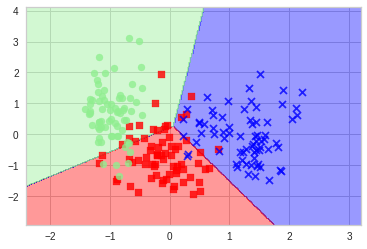

In [38]:
plot_decision_regions(X_combined,
                      y_combined, classifier=lr,
                      test_idx=range(148,210))

## Learning curve using sklearn

In [39]:
# Defining the function to plot the learning curve:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/home/romil/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

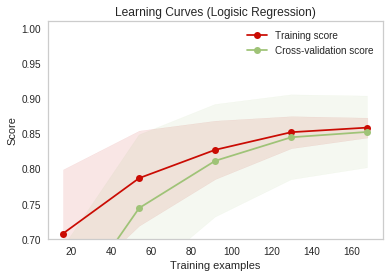

In [40]:
# Plotting for Logistic Regression
title = "Learning Curves (Logisic Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=cv, n_jobs=4)



In [41]:
y_pred = lr.predict(X_test_std)
y_pred

array([3, 2, 1, 1, 3, 2, 2, 2, 2, 3, 1, 3, 3, 3, 2, 2, 3, 2, 1, 1, 3, 3,
       1, 1, 2, 2, 2, 2, 3, 3, 2, 3, 1, 2, 3, 3, 3, 2, 3, 1, 3, 1, 2, 3,
       1, 2, 2, 1, 3, 2, 3, 2, 3, 3, 1, 1, 2, 2, 2, 2, 3, 2, 2])

In [42]:
y_test

array([1, 2, 1, 1, 3, 2, 2, 2, 2, 3, 1, 3, 1, 3, 2, 2, 3, 1, 1, 1, 3, 1,
       1, 1, 2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 1, 2, 3, 1, 2, 3,
       1, 2, 2, 1, 1, 2, 1, 2, 3, 3, 1, 1, 2, 2, 2, 2, 3, 2, 2])

## Confusion matrix

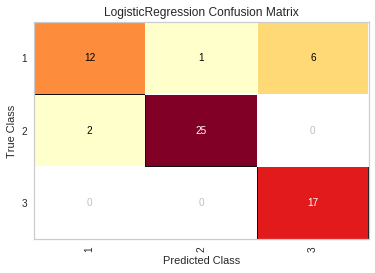

In [43]:
#Plotting the confusion matrix to understand the true positives and negatives and the false positives and negatives

cm = ConfusionMatrix(lr, classes=[1,2,3])
cm.score(X_test_std, y_test)
cm.poof()

```
1.Class 3 is always correctly identified.
2.Other 2 classes is almost correctly identfied.
```

## Classification report

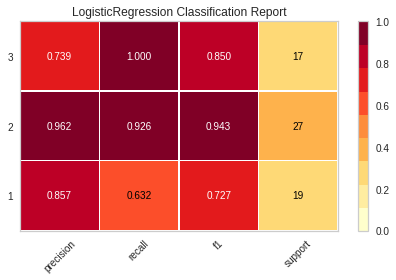

In [30]:

# Generating the classification report containing measures of precision, recall and F1-score

visualizer = ClassificationReport(lr, support=True)

visualizer.fit(X_train_std, y_train)
visualizer.score(X_test_std, y_test)
visualizer.poof()

```
Class 1 has comparatively low recall than other two classes.
```